# Final Round Customer Analysis / Leonardo Olmos Saucedo

## Import libraries to use

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

## Get data

In [2]:
df = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

## Check data

In [3]:
# Check total rows and columns into dataframe
df.shape

(9134, 24)

In [4]:
df.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [5]:
# Get dataframe info to check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# Get object columns
df.select_dtypes(object)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [7]:
# Get numeric columns
df.select_dtypes(np.number)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
# Get statistics values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


## Cleaning/Wrangling/EDA

### Standarize columns

In [9]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### Dealing with NaN values

In [12]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

* There is no null values on the dataset

### Get categorical and numerical features

In [13]:
df_categorical = df.select_dtypes(object)

In [14]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   effective_to_date  9134 non-null   object
 6   employmentstatus   9134 non-null   object
 7   gender             9134 non-null   object
 8   location_code      9134 non-null   object
 9   marital_status     9134 non-null   object
 10  policy_type        9134 non-null   object
 11  policy             9134 non-null   object
 12  renew_offer_type   9134 non-null   object
 13  sales_channel      9134 non-null   object
 14  vehicle_class      9134 non-null   object
 15  vehicle_size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [15]:
df_numerical = df.select_dtypes(np.number)

In [16]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


### Exploration

In [17]:
df_categorical.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [18]:
df_numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## Data processing

### Checking numerical data

In [19]:
cols_numerical = [column for column in df_numerical.columns if column not in ['customer_lifetime_value', 'income', 'total_claim_amount']]

In [20]:
cols_numerical

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [21]:
for column in cols_numerical:
    print(df_numerical[column].value_counts())

monthly_premium_auto
65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: count, Length: 202, dtype: int64
months_since_last_claim
3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: count, dtype: int64
months_since_policy_inception
59    142
61    128
50    125
44    115
3     114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: count, Length: 100, dtype: int64
number_of_open_complaints
0    7252
1    1011
2     374
3     292
4     149
5      56
Name: count, dtype: int64
number_of_policies
1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: cou

* I decided to use all the numerical columns in my analysis, that's why I didn't remove any of them.

### Checking categorical data

In [22]:
cols_categorical = [column for column in df_categorical.columns if column not in ['customer', 'response', 'effective_to_date']]

In [23]:
cols_categorical

['state',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [24]:
for column in cols_categorical:
    print(df_categorical[column].value_counts())

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64
gender
F    4658
M    4476
Name: count, dtype: int64
location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64
marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64
policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64
policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     59

In [25]:
# Dropping list of columns that I considered useless for my analysis
df_categorical = df_categorical.drop(columns= ['customer', 'state', 'education', 'renew_offer_type', 'sales_channel', 'policy', 'vehicle_class'])

In [26]:
df_categorical.head()

,response,coverage,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,vehicle_size
0,No,Basic,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Medsize
1,No,Extended,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Medsize
2,No,Premium,2/19/11,Employed,F,Suburban,Married,Personal Auto,Medsize
3,No,Basic,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Medsize
4,No,Basic,2/3/11,Employed,M,Rural,Single,Personal Auto,Medsize


In [27]:
from datetime import datetime

In [28]:
# Create function to transform string into datetime
def format_date(policy_date):
    policy_date = datetime.strptime(policy_date, '%m/%d/%y').date()
    return policy_date

In [29]:
df_categorical['effective_to_date'] = df_categorical['effective_to_date'].apply(lambda x: format_date(x))

In [30]:
df_categorical['effective_to_date']

0       2011-02-24
1       2011-01-31
2       2011-02-19
3       2011-01-20
4       2011-02-03
           ...    
9129    2011-02-10
9130    2011-02-12
9131    2011-02-06
9132    2011-02-03
9133    2011-02-14
Name: effective_to_date, Length: 9134, dtype: object

In [31]:
# Create a new numerical column with month value from effective_to_date column
df_numerical['effective_to_date_month'] = df_categorical['effective_to_date'].apply(lambda x: x.month)

In [32]:
# We only have two different months that's why I considered that is not a column that could give us a lot of information
df_numerical.drop(columns=['effective_to_date_month'], inplace= True)

In [33]:
df_numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [34]:
# Dropping effective_to_date column because is a column where all the rows have the same year (2011)
df_categorical = df_categorical.drop(columns=['effective_to_date'])

In [35]:
df_categorical.head()

,response,coverage,employmentstatus,gender,location_code,marital_status,policy_type,vehicle_size
0,No,Basic,Employed,F,Suburban,Married,Corporate Auto,Medsize
1,No,Extended,Unemployed,F,Suburban,Single,Personal Auto,Medsize
2,No,Premium,Employed,F,Suburban,Married,Personal Auto,Medsize
3,No,Basic,Unemployed,M,Suburban,Married,Corporate Auto,Medsize
4,No,Basic,Employed,M,Rural,Single,Personal Auto,Medsize


## Encoding categorical data

In [36]:
categorical_encoded_df = pd.get_dummies(df_categorical, drop_first= True)

In [37]:
categorical_encoded_df

,response_Yes,coverage_Extended,coverage_Premium,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Medsize,vehicle_size_Small
0,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False
1,False,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False
2,False,False,True,True,False,False,False,False,True,False,True,False,True,False,True,False
3,False,False,False,False,False,False,True,True,True,False,True,False,False,False,True,False
4,False,False,False,True,False,False,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,True,False,False,False,True,False,True,True,False,True,False,True,False
9130,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
9131,False,True,False,False,False,False,True,True,True,False,False,True,False,False,True,False
9132,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False,False


In [38]:
categorical_encoded_df.shape

(9134, 16)

* I used get_dummies but I also could used one hot encoder for those columns that have a priority like coverage, vehicle_size and policy_type.

In [39]:
customer_df = pd.concat([df_numerical, categorical_encoded_df], axis=1)

In [40]:
customer_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,response_Yes,coverage_Extended,...,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,True,False,True,False,False,False,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,True,...,True,False,True,False,False,True,True,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,False,...,False,False,True,False,True,False,True,False,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,True,True,True,False,True,False,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,False,False,...,False,True,False,True,True,False,True,False,True,False
9130,3096.511217,21604,79,14,28,0,1,379.200000,True,True,...,False,False,True,False,False,False,False,False,True,False
9131,8163.890428,0,85,9,37,3,2,790.784983,False,True,...,True,True,True,False,False,True,False,False,True,False
9132,7524.442436,21941,96,34,3,0,3,691.200000,False,True,...,False,True,True,False,True,False,True,False,False,False


## Visualization

<Figure size 2000x2000 with 0 Axes>

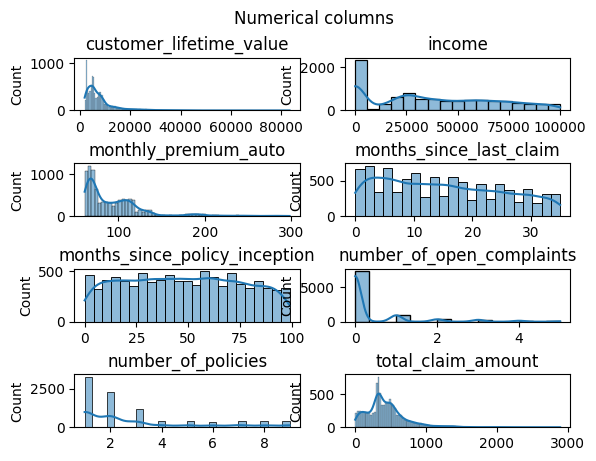

In [41]:
# Plotting numerical data

plt.figure(figsize=(20, 20))
plt.subplots(4,2) 
plt.subplots_adjust(hspace=1) # height reserved for space between subplots, expressed as a fraction of the average axis height
plt.suptitle('Numerical columns')

for idx,column in enumerate(df_numerical.columns):
    ax=plt.subplot(4,2,idx+1) #index in subplot matrix starts at 1
    sns.histplot(df_numerical[column], kde=True)
    ax.set_title(column)
    ax.set_xlabel("")
    
plt.show()

In [42]:
df_categorical.columns

Index(['response', 'coverage', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'vehicle_size'],
      dtype='object')

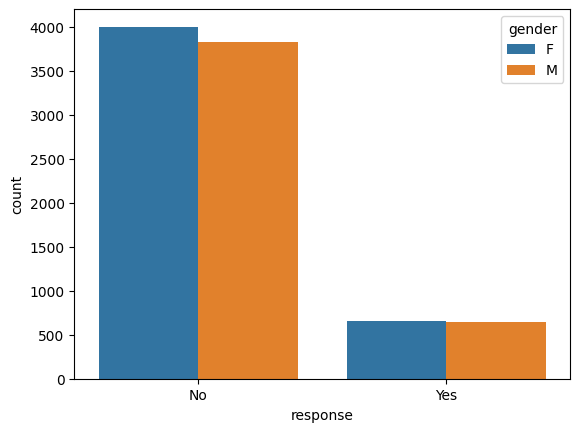

In [50]:
# Plotting categorical data

sns.countplot(data = df_categorical, x = df_categorical['response'], hue='gender')
plt.show()

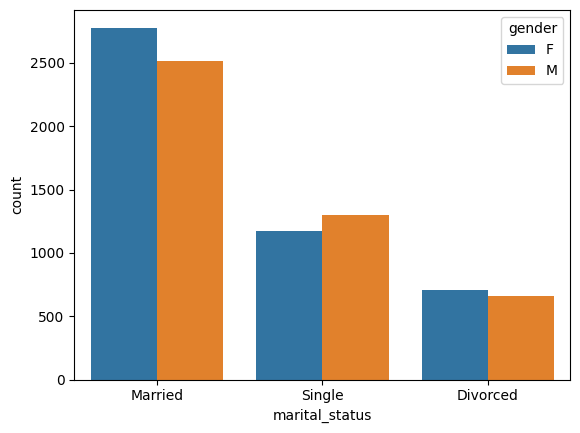

In [54]:
sns.countplot(data = df_categorical, x = df_categorical['marital_status'], hue='gender')
plt.show()

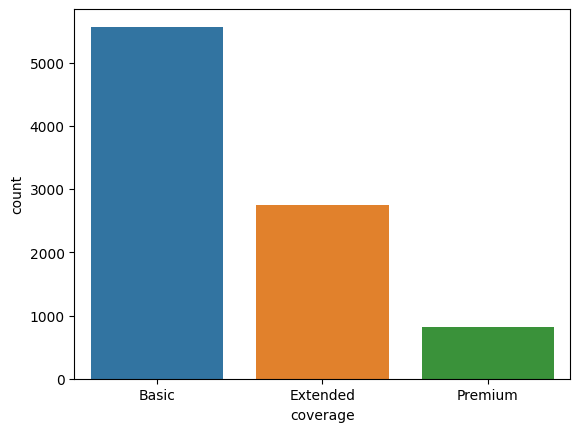

In [52]:
sns.countplot(data = df_categorical, x = df_categorical['coverage'])
plt.show()

## Correlation

In [56]:
correlation_mtx = df_numerical.corr()

In [57]:
correlation_mtx

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


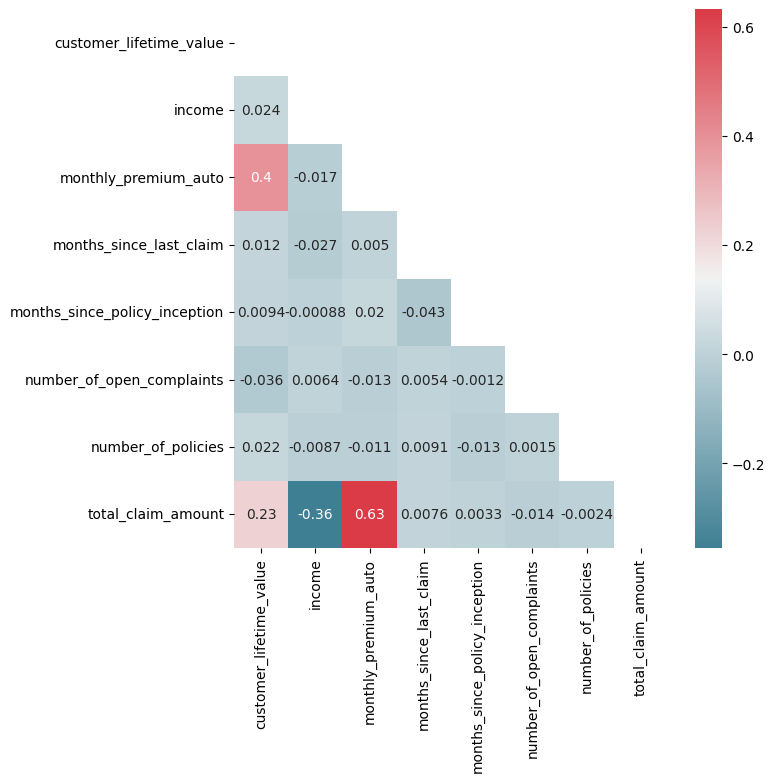

In [61]:
# Plotting correlation matrix

mask=np.triu(np.ones_like(correlation_mtx, dtype=bool))

f, ax=plt.subplots(figsize=(7, 7))

cmap=sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_mtx, mask=mask, cmap=cmap, annot=True)

plt.show()

* I've decide to not drop any numerical column because doesn't exist a ver high correlated columns

## Splitting into X and y

In [62]:
y = df_numerical['total_claim_amount']

In [63]:
X = customer_df.drop(columns=['total_claim_amount'])

In [64]:
y.shape

(9134,)

In [65]:
X.shape

(9134, 23)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
X_train.shape

(6850, 23)

In [68]:
X_test.shape

(2284, 23)

## Normalization

In [72]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
df_X_train_pt = pd.DataFrame(X_train_pt, columns=X_train.columns)
df_X_train_pt.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_Yes,coverage_Extended,coverage_Premium,...,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Medsize,vehicle_size_Small
0,-0.154555,0.807677,1.360867,1.657330,1.471319,-0.500344,-1.152021,2.468015,1.528056,-0.316025,...,-0.576564,1.016783,-1.313707,-0.461323,0.845112,-0.601522,-1.710410,-0.210634,0.64511,-0.485126
1,1.102186,-1.655812,1.806474,0.058035,0.799894,-0.500344,0.873446,-0.405184,-0.654426,-0.316025,...,1.734414,-0.983494,0.761205,-0.461323,-1.183275,1.662449,-1.710410,4.747580,0.64511,-0.485126
2,0.434349,0.401585,0.584358,1.188175,0.162640,1.953933,1.126458,-0.405184,1.528056,-0.316025,...,-0.576564,-0.983494,-1.313707,2.167680,0.845112,-0.601522,0.584655,-0.210634,0.64511,-0.485126


In [ ]:
X_test_pt = pt.transform(X_test)
df_X_test_pt = pd.DataFrame(X_test_pt, columns=X_train.columns)
df_X_test_pt.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,response_Yes,coverage_Extended,coverage_Premium,...,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,vehicle_size_Medsize,vehicle_size_Small
0,-0.580388,0.892951,0.782412,-1.675324,0.129050,-0.500344,-1.152021,-0.405184,-0.654426,-0.316025,...,-0.576564,1.016783,-1.313707,-0.461323,0.845112,-0.601522,0.584655,-0.210634,0.645110,-0.485126
1,-0.116343,0.148364,-0.709595,-0.698111,-1.431989,-0.500344,0.873446,-0.405184,-0.654426,-0.316025,...,-0.576564,-0.983494,0.761205,-0.461323,-1.183275,1.662449,0.584655,-0.210634,0.645110,-0.485126
2,-0.771454,1.079498,0.420686,-1.278645,-0.254527,-0.500344,-1.152021,2.468015,1.528056,-0.316025,...,-0.576564,-0.983494,0.761205,-0.461323,0.845112,-0.601522,0.584655,-0.210634,-1.550123,2.061320


# Modeling

In [76]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_train = linear_regression.predict(X_train)

y_pred_test= linear_regression.predict(X_test)

# Model validation

## Initial model

In [79]:
# Getting R2

train_score = linear_regression.score(X_train, y_train) 

test_score= linear_regression.score(X_test, y_test)

print('Train score for initial model: {: 2f}'.format(train_score))

print('Test score for initial model: {: 2f}'.format(test_score))

Train score for initial model:  0.771086
Test score for initial model:  0.764473


In [81]:
# Getting MSE

train_mse = mse(y_pred_train,y_train)

test_mse = mse(y_pred_test,y_test)

print('MSE for initial model: {: 2f}'.format(train_mse))

print('MSE for initial model: {: 2f}'.format(test_mse))

MSE for initial model:  19578.720201
MSE for initial model:  19051.758889


In [83]:
# Getting MAE

train_mae = mae(y_pred_train,y_train)

test_mae = mae(y_pred_test,y_test)

print('MAE for initial model: {: 2f}'.format(train_mae))

print('MAE for initial model: {: 2f}'.format(test_mae))

MAE for initial model:  96.236092
MAE for initial model:  94.870333


## Using power transformer

In [85]:
linear_regression_pt = LinearRegression()

linear_regression_pt.fit(X_train_pt, y_train)

y_pred_train_pt = linear_regression_pt.predict(X_train_pt)

y_pred_test_pt = linear_regression_pt.predict(X_test_pt)

In [87]:
# Getting R2

train_score_pt = linear_regression_pt.score(X_train_pt, y_train) 

test_score_pt = linear_regression_pt.score(X_test_pt, y_test)

print('Train score for model using power transformer: {: 2f}'.format(train_score_pt))

print('Test score for model using power transformer: {: 2f}'.format(test_score_pt))

Train score for model using power transformer:  0.691380
Test score for model using power transformer:  0.674782


In [88]:
# Getting MSE

train_mse_pt = mse(y_pred_train_pt,y_train)

test_mse_pt = mse(y_pred_test_pt,y_test)

print('MSE for model using power transformer: {: 2f}'.format(train_mse_pt))

print('MSE for model using power transformer: {: 2f}'.format(test_mse_pt))

MSE for model using power transformer:  26395.846030
MSE for model using power transformer:  26306.878327


In [89]:
# Getting MAE

train_mae_pt = mae(y_pred_train_pt,y_train)

test_mae_pt = mae(y_pred_test_pt,y_test)

print('MAE for model using power transformer: {: 2f}'.format(train_mae_pt))

print('MAE for model using power transformer: {: 2f}'.format(test_mae_pt))

MAE for model using power transformer:  110.488136
MAE for model using power transformer:  110.021671


# Reporting

* I got best performance with my initial model, it means that for this case study was useless to use power transformer, maybe using another scaler my performance could be better or using columns that I dropped.